In [ ]:
import numpy as np # processsing 
import matplotlib.pyplot as plt # visualisation
import pandas as pd # processsing 
import seaborn as sns # visualisation
from sklearn.datasets import load_iris # dataset

import warnings # to avoid unneccessary warnings
warnings.filterwarnings('ignore')

In [ ]:
data = load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names) # data -> dataframes
df['Species'] = data.target

# 0, 1, 2 -> setosa, vesicolor and virginica
target = np.unique(data.target) 
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = df.drop(['Species'], axis=1)
y = df['Species']

feature_names = df.columns

labels = y.unique()

In [ ]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='sepal length (cm)', ylabel='count'>

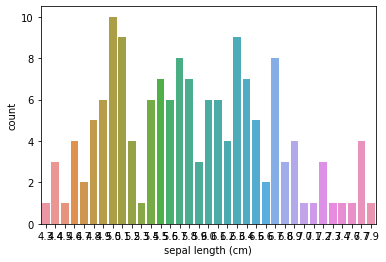

In [ ]:
sns.countplot(df['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='count'>

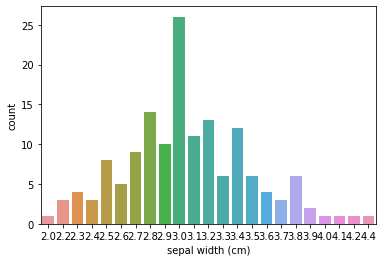

In [ ]:
sns.countplot(df['sepal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='count'>

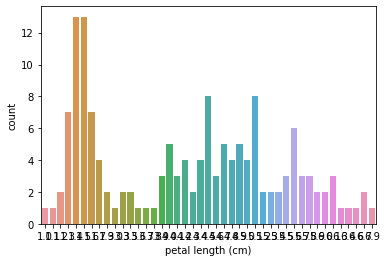

In [ ]:
sns.countplot(df['petal length (cm)'])

<AxesSubplot:xlabel='petal width (cm)', ylabel='count'>

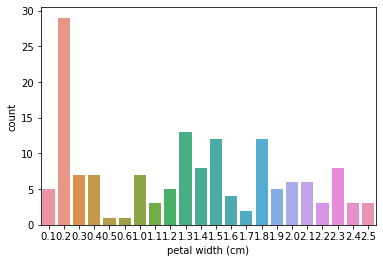

In [ ]:
sns.countplot(df['petal width (cm)'])

In [ ]:
print(df.mean())
print(df.std())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(criterion='entropy', random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

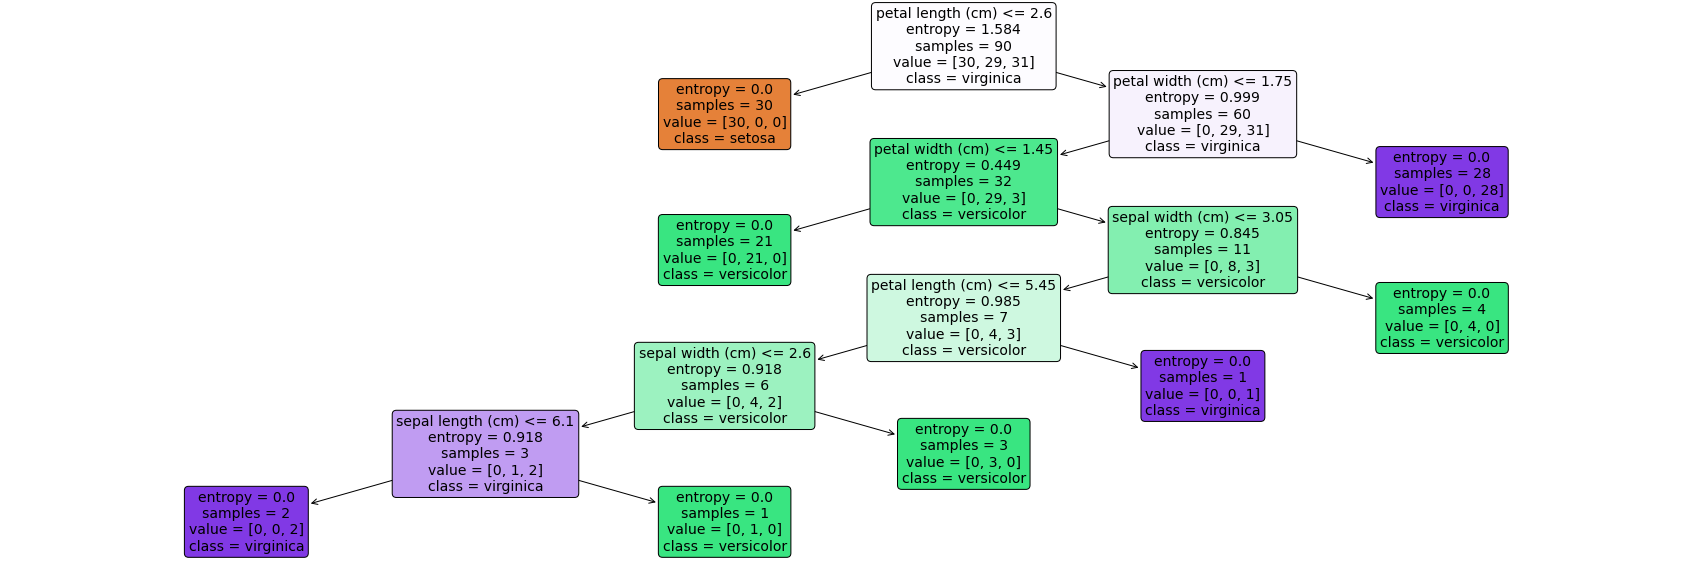

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))

a = tree.plot_tree(model,
                   #use the feature names stored
                   feature_names = feature_names,
                   class_names = labels,
                   #use the class names stored
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

print(accuracy_score(y_test.T, predict))

0.95


In [ ]:
print(classification_report(y_test.T, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.91      0.95      0.93        21
           3       0.94      0.89      0.92        19

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



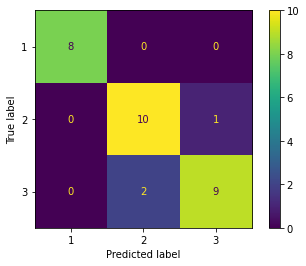

In [ ]:
plot_confusion_matrix(model, x_test, y_test.T)